**Inteligência Artificial**

**812839 - Vinícius Miranda de Araújo**

**Lista 02**

---
---


### **Questão 1**

---

Encontrar o padrão de pessoas que sobreviveram ao desastre do TITANIC, que matou mais de 1.500 pessoas em 1912. A base de dados está no CANVAS.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn import tree
import pickle

# Carregar os dados
data = pd.read_csv('titanic.csv')

# Visualizar as primeiras linhas
data.head()

# Remover colunas irrelevantes ou com muitos valores ausentes
data.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId'], inplace=True)

# Preenchendo valores ausentes
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Transformação de dados categóricos
cols_label_encode = ['Sex', 'Embarked']
data[cols_label_encode] = data[cols_label_encode].apply(LabelEncoder().fit_transform)

# Separar variáveis independentes e dependentes
X_prev = data.drop(columns=['Survived'])
y_classe = data['Survived']

# Dividir os dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X_prev, y_classe, test_size=0.20, random_state=42)

# Salvar os dados pré-processados
with open('titanic.pkl', 'wb') as f:
    pickle.dump([X_treino, X_teste, y_treino, y_teste], f)

# Definição de hiperparâmetros para Decision Tree
params = {
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [None, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
}

modelo = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=params,
    cv=10,
    n_jobs=5,
    verbose=1,
)

modelo.fit(X_treino, y_treino)
print("Melhores hiperparâmetros:", modelo.best_params_)
print("Melhor pontuação:", modelo.best_score_)

# Treinar modelo final com os melhores hiperparâmetros
modelo_final = DecisionTreeClassifier(
    max_depth=modelo.best_params_['max_depth'],
    criterion=modelo.best_params_['criterion'],
    max_features=modelo.best_params_['max_features']
)
modelo_final.fit(X_treino, y_treino)

# Fazer previsões
previsoes = modelo_final.predict(X_teste)

# Avaliação do modelo
print("Acurácia:", accuracy_score(y_teste, previsoes))
print("Relatório de classificação:\n", classification_report(y_teste, previsoes))

# Matriz de confusão
cm = ConfusionMatrix(modelo_final)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

# Visualização da árvore de decisão
previsores = X_prev.columns.tolist()
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
tree.plot_tree(modelo_final, feature_names=previsores, class_names=['Não sobreviveu', 'Sobreviveu'], filled=True);
plt.show()


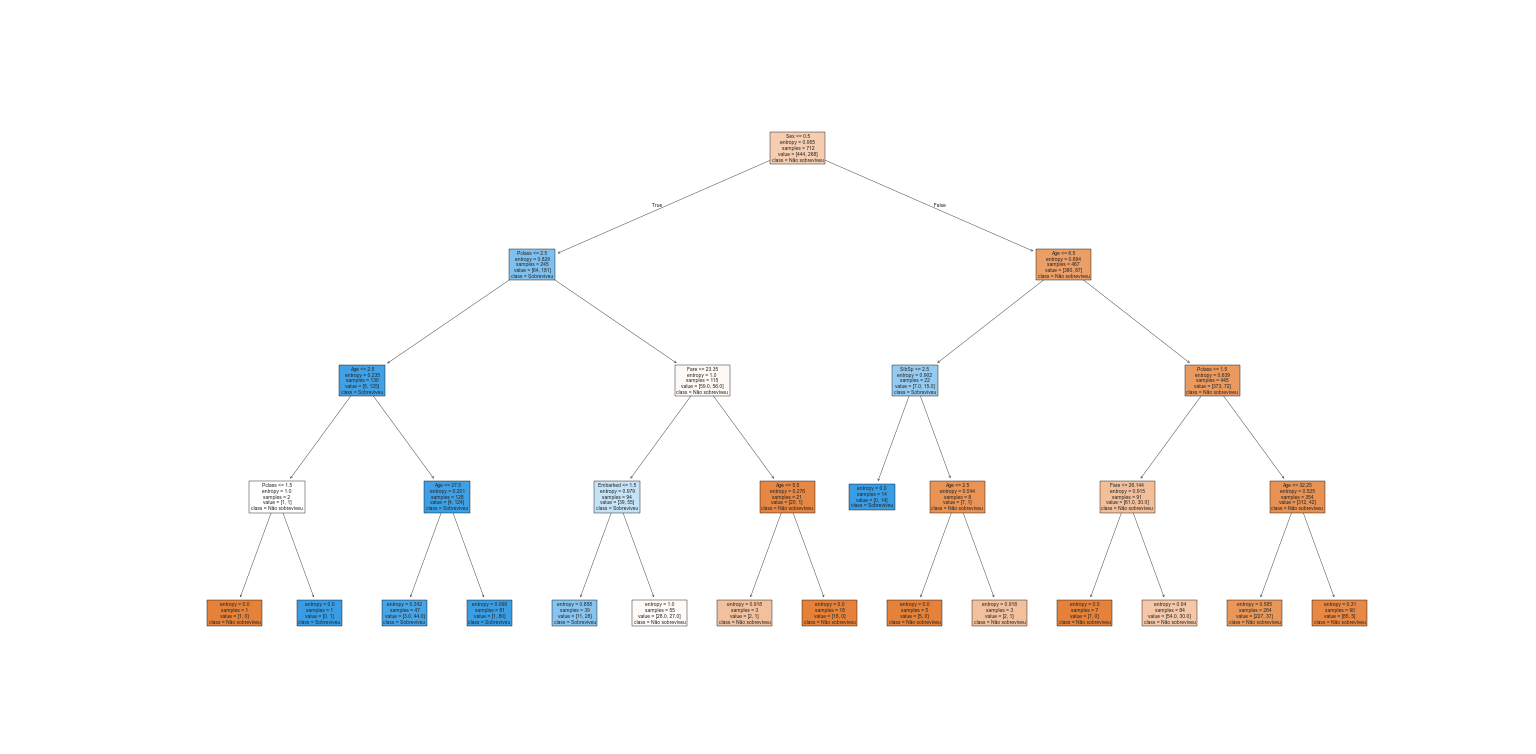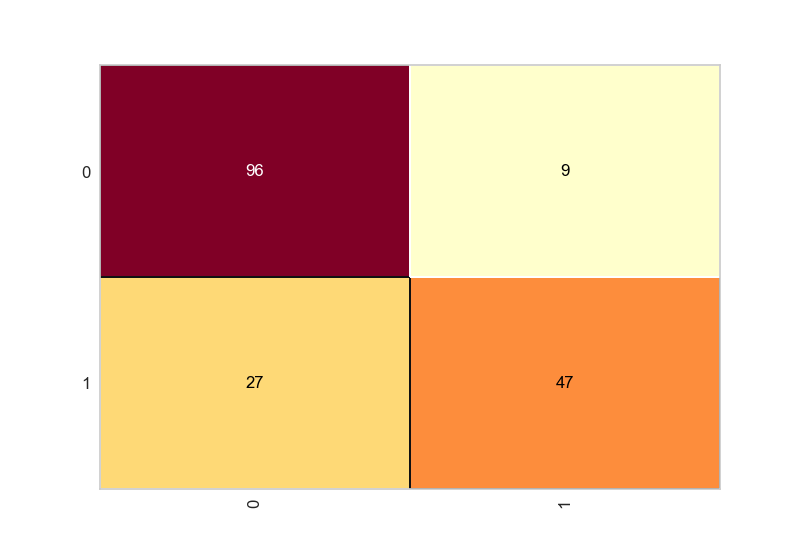

A árvore de decisão mostra os principais fatores que influenciaram a sobrevivência no Titanic:

1. **Sexo (Sex)**: O fator mais importante. Mulheres (Sex = 0) tinham muito mais chances de sobreviver.
2. **Classe da passagem (Pclass)**: Passageiros da 1ª classe tiveram maior taxa de sobrevivência do que os da 3ª.
3. **Idade (Age)**: Passageiros mais jovens tiveram mais chances de sobreviver, especialmente crianças.
4. **Número de parentes a bordo (SibSp, Parch)**: Pessoas com familiares a bordo tinham maior probabilidade de sobreviver.

### **Questão 2**

---

Considerando o artigo "A comparative study of decision tree ID3 and C4.5":

1. As principais diferenças entre os algoritmos ID3 e C4.5 são:

  - Tratamento de Dados Contínuos: O algoritmo ID3 não consegue lidar eficientemente com atributos contínuos, enquanto o C4.5 pode dividir atributos contínuos em intervalos, permitindo o uso de dados numéricos.

  - Tratamento de Valores Ausentes: O C4.5 pode lidar com valores ausentes de forma mais eficaz, o que não é uma capacidade do ID3.

  - Podas e Previsão Pessimista: C4.5 implementa técnicas de poda após a criação da árvore, tornando-a menos propensa ao overfitting. ID3, por outro lado, não possui uma estratégia de poda tão robusta.

  - Cálculo do Ganho de Informação: C4.5 melhora o cálculo do ganho de informação do ID3 introduzindo a razão de ganho, que ajuda a evitar o viés em atributos com muitos valores, um ponto fraco do ID3.

2. O algoritmo C4.5 lida com atributos de entrada que são numéricos dividindo esses atributos em intervalos. Durante o processo de construção da árvore, ele analisa os dados contínuos e determina os pontos de divisão que melhor segregam as classes, permitindo que a árvore utilize informações de atributos numéricos de maneira eficaz.

### **Questão 3**

---

Considerando a árvore que classifica o objeto nas classes: Iris_Setosa, Iris_Virgínica e Iris_Versicolor e que esta árvore foi gerada com os hiperparâmetros (DecisionTreeClassifier(criterion='gini', max_depth=3)),
usando a linguagem Python.

Qual as **saídas** da árvore para os seguintes **registros de teste**, respectivamente?


| Registros de teste | Tamanho da Pétala | Largura da Pétala | Tamanho da Sépala | Largura da Sépala |
|------------|------|------|------|------|
|Instância 1 | 3.46 | 0.87 | 2.45 | 1.78 |
|Instância 2 | 1.67 | 1.89 | 0.78 | 1.32 |
|Instância 3 | 2.56 | 2.34 | 2.45 | 1.78 |
|Instância 4 | 6.67 | 2.34 | 2.45 | 1.78 |

a) Iris_Virgínica, íris_Setosa, Iris_Versicolor, Iris_Virgínica

b) Iris_ Setosa, íris_Setosa, Iris_Virgínica , Iris_Versicolor

c) Iris_Versicolor, íris_Setosa, Iris_Versicolor, Iris_Virgínica

d) Íris_Setosa, Iris_Virgínica, Iris_Virgínica , Iris_Versicolor

e) Iris_Versicolor, Íris_Setosa, Iris_Versicolor, Íris_Setosa

**Resposta: Letra C**

### **Questão 4**

---

Considerando a árvore da questão anterior:

  I. Esta árvore possui 5 regras de classificação

  II. Das regras geradas, há apenas uma com cobertura por classe de 100%

  III. A menor cobertura por classe é de 6.8% e corresponde à classe Iris_Virgínica

É correto o que se afirma em:

a) I, apenas.

b) III, apenas.

c) I e II, apenas.

d) I e III, apenas.

e) I, II e III.

**Resposta: Letra A**

### **Questão 5**

---

Considere a seguinte matriz de confusão:

|   |  A |  B |  C |  D |
|---|----|----|----|----|
| A | 10 |  4 |  2 |  1 |
| B |  1 | 15 |  2 |  0 |
| C |  2 |  3 | 20 |  5 |
| D |  4 |  1 |  2 | 50 |

Quais os valores para as métricas abaixo para cada uma das classes A, B, C e D?

|   |  Precisão |  Recall | F1Score | TVP | TFN | TFP | TVN |
|---|-----------|---------|---------|-----|-----|-----|-----|
| A |     -     |    -    |    -    |  -  |  -  |  -  |  -  |
| B |     -     |    -    |    -    |  -  |  -  |  -  |  -  |
| C |     -     |    -    |    -    |  -  |  -  |  -  |  -  |
| D |     -     |    -    |    -    |  -  |  -  |  -  |  -  |

**Respostas: Executar o código abaixo**


In [ ]:
import numpy as np
import pandas as pd

def calcular_metricas( matrix_conf ):
    classes = ['A', 'B', 'C', 'D']
    metricas = {"Precisão": [], "Recall": [], "F1Score": [], "TVP": [], "TFN": [], "TFP": [], "TVN": []}

    total_amostras = np.sum( matrix_conf )
    soma_linhas    = np.sum( matrix_conf, axis=1 )
    soma_colunas   = np.sum( matrix_conf, axis=0 )

    for i, cls in enumerate(classes):
        VP = matrix_conf[i, i]                  # Verdadeiros positivos (Diagonal Principal)
        FN = soma_linhas[i] - VP                # Falsos negativos
        FP = soma_colunas[i] - VP               # Falsos positivos
        VN = total_amostras - ( VP + FN + FP )  # Verdadeiros negativos

        try:
            precisao = VP / (VP + FP) if (VP + FP) > 0 else None
            recall   = VP / (VP + FN) if (VP + FN) > 0 else None
            f1_score = 2 * (precisao * recall) / (precisao + recall) if (precisao and recall and (precisao + recall) > 0) else None
            tvp      = VP / (VP + FN) if (VP + FN) > 0 else None
            tfn      = FN / (VP + FN) if (VP + FN) > 0 else None
            tfp      = FP / (FP + VN) if (FP + VN) > 0 else None
            tvn      = VN / (FP + VN) if (FP + VN) > 0 else None
        except ZeroDivisionError:
            print( "Erro: impossível dividir por 0!" )

        metricas["Precisão"].append( precisao )
        metricas["Recall"].append( recall )
        metricas["F1Score"].append( f1_score )
        metricas["TVP"].append( tvp )
        metricas["TFN"].append( tfn )
        metricas["TFP"].append( tfp )
        metricas["TVN"].append( tvn )

    return pd.DataFrame(metricas, index=classes)
# calcular_metricas ( )

# --------------------------------------------
# --- Main
# --------------------------------------------

if __name__ == "__main__":
  matriz = np.array([[10, 4, 2, 1],
                     [1, 15, 2, 0],
                     [2, 3, 20, 5],
                     [4, 1, 2, 50]])

  df_metricas = calcular_metricas( matriz )
  print( df_metricas )


   Precisão    Recall   F1Score       TVP       TFN       TFP       TVN
A  0.588235  0.588235  0.588235  0.588235  0.411765  0.066667  0.933333
B  0.652174  0.833333  0.731707  0.833333  0.166667  0.076923  0.923077
C  0.769231  0.666667  0.714286  0.666667  0.333333  0.065217  0.934783
D  0.892857  0.877193  0.884956  0.877193  0.122807  0.092308  0.907692
